# Fundamentals of Machine Learning - Exercise 1a
### Deadline: 20.11.2020, 16:00

- Zhao Sun (Matriculation Number 3630998)
- M.Sc. Scientific Computing, Heidelberg University

In [1]:
import numpy as np # matrices and multi - dimensional arrays , linear algebra
import sklearn # machine learning
import matplotlib.pyplot as plt # plotting

## Monte-Carlo Simulation
### 1.1 Data Creation and Visualization (7 points)

### Formula Derivation

#### CASE $p(X=x | Y=0) = 2-2x$
If $Y=0$,  CDF(x) $ = u = \int_{0}^{x} (2-2x)\,dx = 2x-x^2 $, then inverse CDF(x), $ x = 1+ \sqrt{1-u}$


#### CASE $p(X=x | Y=0) = 2x$
If $Y=1$,  CDF(x) $ = u = \int_{0}^{x} (2x)\,dx = x^2 $, then inverse CDF(x), $ x = \sqrt{u}$


In [2]:
from math import sqrt

def create_data(N):
    Y = (np.random.random(N)>0.5).astype(int)
    u = np.random.random(N)
    X = np.zeros(N)
    for i in range(N):
        if Y[i] == 0:
            X[i] = 1 - sqrt(1-u[i])
        else:
            X[i] = sqrt(u[i])
    return X,Y

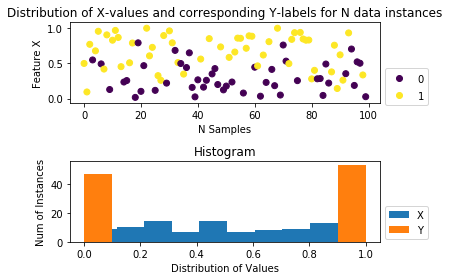

In [3]:
N = 100
X,Y = create_data(N)

fig, (ax1,ax2) = plt.subplots(2,1)
sc1 = ax1.scatter(np.arange(N),X,c=Y)
ax1.legend(*sc1.legend_elements(),bbox_to_anchor=(1, 0.5))
ax1.set_title("Distribution of X-values and corresponding Y-labels for N data instances")
ax1.set_ylabel("Feature X")
ax1.set_xlabel("N Samples")

ax2.hist(X,label="X")
ax2.hist(Y,label="Y")
ax2.set_title("Histogram")
ax2.set_ylabel("Num of Instances")
ax2.set_xlabel("Distribution of Values")
ax2.legend(bbox_to_anchor=(1, 0.5))

plt.tight_layout()

### 1.2 Classification by Thresholding (5 points)


In [11]:
def error_rate_rule_A(x_t):
    a = 0.25 + (x_t-0.5)**2
    return a

def run_experiment(X,Y, x_t,to_print=False):
    Y_head = np.zeros_like(Y)
    output = []
    for x in x_t:            
        Y_head = (X >= x).astype(int)
        a_head = (Y_head != Y).sum() / Y_head.size
        a = error_rate_rule_A(x)
        output.append(a_head)
        if to_print:
            print("x_t = {}, predicted error rate based on Rule A = {}, experiement error rate = {}".format(x,a, a_head))
    return np.array(output)

x_t = [0.2,0.5,0.6]
run_experiment(X,Y,x_t,to_print=True)


x_t = 0.2, predicted error rate based on Rule A = 0.33999999999999997, experiement error rate = 0.33
x_t = 0.5, predicted error rate based on Rule A = 0.25, experiement error rate = 0.2518
x_t = 0.6, predicted error rate based on Rule A = 0.26, experiement error rate = 0.2597


array([0.33  , 0.2518, 0.2597])

In [12]:
n = 10
M = [10,100,1000,10000]

stats = []
for N in M:
    results = np.zeros([n,len(x_t)])
    for i in range(n):
        X, Y = create_data(N)
        error = run_experiment(X,Y,x_t)
        results[i] = error
    stats.append([N, results.mean(axis=0),results.std(axis=0)])

num = np.array(stats)[:,0]
mu = np.vstack(np.array(stats)[:,1].tolist())
std = np.vstack(np.array(stats)[:,2].tolist())
#print(num,'\n',mu,'\n',std)

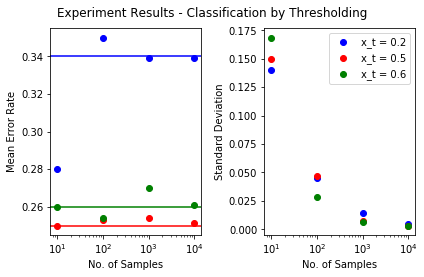

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Experiment Results - Classification by Thresholding")

ax1.set_ylabel('Mean Error Rate')
ax1.set_xlabel("No. of Samples")
ax1.set_xscale('log')
ax1.plot(num,mu[:,0],'bo')
ax1.plot(num,mu[:,1],'ro')
ax1.plot(num,mu[:,2],'go')
ax1.axhline(y=error_rate_rule_A(x_t[0]),c="blue")
ax1.axhline(y=error_rate_rule_A(x_t[1]),c="red")
ax1.axhline(y=error_rate_rule_A(x_t[2]),c="green")

ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel("No. of Samples")
ax2.set_xscale('log')
ax2.plot(num,std[:,0],'bo',label="x_t = {}".format(x_t[0]))
ax2.plot(num,std[:,1],'ro',label="x_t = {}".format(x_t[1]))
ax2.plot(num,std[:,2],'go',label="x_t = {}".format(x_t[2]))
ax2.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


#### OBSERVATIONS
1. The chart above confirms that the minimum overall error of 25% is achieved when the threshold $x_t = 0.5$ (red line vs blue and green lines);
2. The error standard deviation decrease with increasing M.

### 1.3 Baseline Classifiers (2 points)

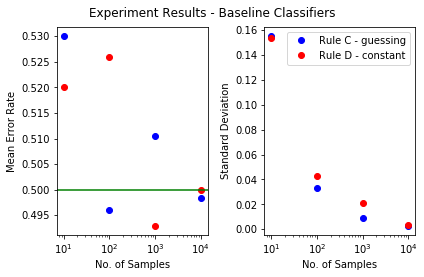

In [14]:
stats_base = []
for N in M:
    results = np.zeros([n,2])
    for i in range(n):
        X, Y = create_data(N)
        Y_c = (np.random.random(N)>0.5).astype(int)
        Y_d = np.ones(N)
        error_c = (Y_c != Y).sum() / N
        error_d = (Y_d != Y).sum() / N
        results[i] = [error_c, error_d]
    stats_base.append([N, results.mean(axis=0),results.std(axis=0)])

num = np.array(stats_base)[:,0]
mu = np.vstack(np.array(stats_base)[:,1].tolist())
std = np.vstack(np.array(stats_base)[:,2].tolist())


fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Experiment Results - Baseline Classifiers")

ax1.set_ylabel('Mean Error Rate')
ax1.set_xlabel("No. of Samples")
ax1.set_xscale('log')
ax1.plot(num,mu[:,0],'bo')
ax1.plot(num,mu[:,1],'ro')
ax1.axhline(y=0.5,c="green")

ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel("No. of Samples")
ax2.set_xscale('log')
ax2.plot(num,std[:,0],'bo',label="Rule C - guessing")
ax2.plot(num,std[:,1],'ro',label="Rule D - constant")
ax2.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


### 1.4 Nearest Neighbor Classification (6 points)

In [15]:
def create_data_2():
    u = np.random.random(2)
    Y = np.array([0,1])
    X = np.array([1 - sqrt(1-u[0]), sqrt(u[1])])
    
    return X,Y


def nearest_neightbour_classifier(training_data, test_data):
    M = len(test_data[0])
    predict = np.zeros(M)
    
    for i in range(M):
        dist = abs(training_data[0] - test_data[0][i])
        idx = dist.argmin()
        predict[i] = training_data[1][idx]
    
    return predict


In [16]:
# Determine the error rate of the nearest neighbour classifier on a sufficiently large test set

N_test = 10000
test_data = create_data(N_test)
training_data = create_data_2()
prediction = nearest_neightbour_classifier(training_data, test_data)
error_rate = (prediction != test_data[1]).sum() / N_test


# Repeat this with 100 different training sets (all of size N = 2) and compute the average error on the same test set

errors = np.zeros(100)
for i in range(100):
    training_data = create_data_2()
    prediction = nearest_neightbour_classifier(training_data, test_data)
    errors[i] = (prediction != test_data[1]).sum() / N_test
print("Average error rate with training sets of size N = 2: {:1.1%}".format(errors.mean()))

Average error rate with training sets of size N = 2: 35.5%


In [17]:
# Repeat the experiment with training sets of size N = 100 and report the average error

errors = np.zeros(100)
for i in range(100):
    training_data = create_data(100)
    prediction = nearest_neightbour_classifier(training_data, test_data)
    errors[i] = (prediction != test_data[1]).sum() / N_test
print("Average error rate with training sets of size N = 100: {:1.1%}".format(errors.mean()))

Average error rate with training sets of size N = 100: 33.2%
